In [510]:
import pandas as pd
import seaborn as sns, numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

df = pd.read_csv('train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [511]:
# Analisando como é a distribuição dos valores númericos

df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [512]:
# Analisando o dataframe no geral, para entender o que vai ser preciso fazer com a base

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [513]:
# Analisando a quantidade de pessoas que sobreviveram

df.Survived.value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [514]:
# Analisando o sexo das pessoas

df.Sex.value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [515]:
# Analisando a distribuição de classes

df.Pclass.value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [516]:
# A quanidade de pessoas de cada embarque

df.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [517]:
# Qunatidade de irmãos ou conjuguês no navio

df.SibSp.value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

In [518]:
# Quantidade de pais ou filhos no navio

df.Parch.value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

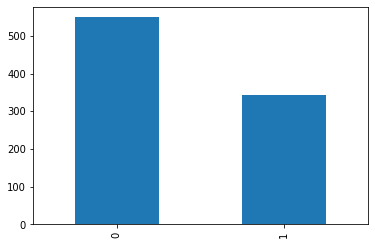

In [519]:
# Gráfico da quantidade de pessoas que sobreviveram

df.Survived.value_counts().plot(kind="bar")
plt.show()

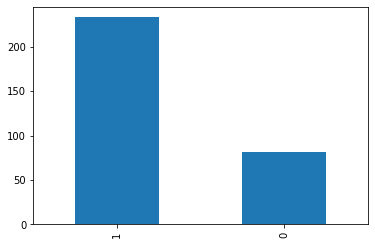

In [520]:
# Pessoas do sexo feminino que sobreviveram

df.Survived[(df.Sex=="female")].value_counts().plot(kind="bar")
plt.show()

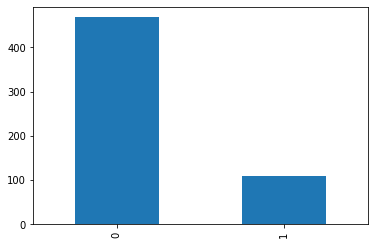

In [521]:
# Pessoas do sexo masculino que sobreviveram


df.Survived[(df.Sex=="male")].value_counts().plot(kind="bar")
plt.show()

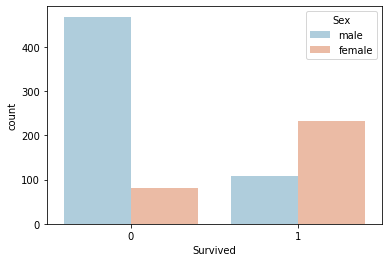

In [522]:
# Gráficos de sobreviventes por sexo

sns.countplot(x='Survived', hue='Sex', data=df, palette='RdBu_r')

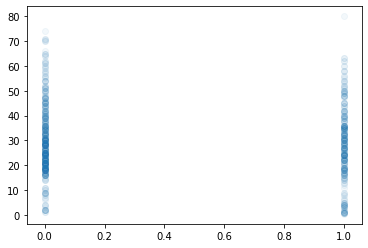

In [523]:
# Distribuição da idade dentro dos sobreviventes

plt.scatter(df.Survived, df.Age, alpha=0.05)
plt.show()

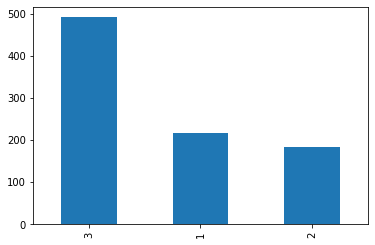

In [524]:
# Gráfico da distribuição de classe

df.Pclass.value_counts().plot(kind="bar")

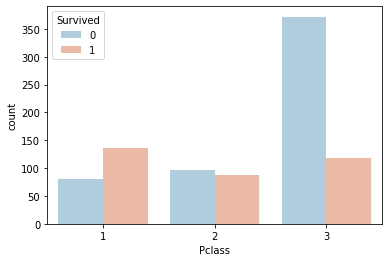

In [525]:
# Distribuição de classes por sobreviventes

sns.countplot(x='Pclass', hue='Survived', data=df, palette='RdBu_r')

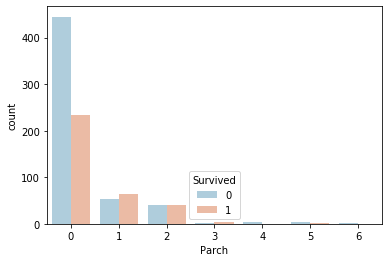

In [526]:
# Distribuição de 'Parch' por sobreviventes

sns.countplot(x='Parch', hue='Survived', data=df, palette='RdBu_r')

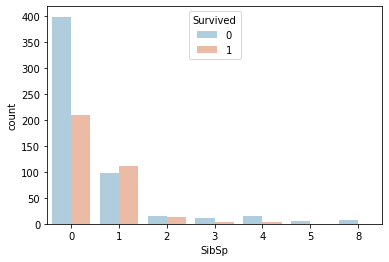

In [527]:
# Distribuição de 'SibSp' por sobreviventes


sns.countplot(x='SibSp', hue='Survived', data=df, palette='RdBu_r')

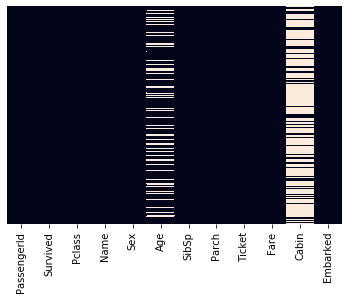

In [528]:
# Analise dos valores nulos

sns.heatmap(df.isnull(), yticklabels=False, cbar=False)

In [529]:
# Dropando a coluna de 'Ticket', visto que tem muito valor nulo e ser dificil de preencher

df.drop('Ticket',axis=1,inplace=True)

In [530]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,NaN,S


In [531]:
print(df)

PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                                 ...     ...   ...    ..

In [532]:
df.groupby(['Pclass','Sex']).mean()['Age']

Pclass  Sex   
1       female    34.611765
        male      41.281386
2       female    28.722973
        male      30.740707
3       female    21.750000
        male      26.507589
Name: Age, dtype: float64

In [533]:
# Preenchendo valores nulos na coluna de 'Age' 

age_by_sex_pclass = df.groupby(['Pclass','Sex']).mean()['Age']

def add_mean_on_null(age, pclass, sex):
    if(age > 0):
        return age
    else:
        isMale = 0
        if(sex == 'male'):
            isMale = 1
        return age_by_sex_pclass[pclass][isMale]
        
df['Age'] = df[['Age', 'Pclass','Sex']].apply(lambda x : add_mean_on_null(x.Age, x.Pclass, x.Sex),axis=1)

In [534]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Fare         891 non-null    float64
 9   Cabin        204 non-null    object 
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [535]:
print(df)

PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex    Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.00      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.00      1   
2                               Heikkinen, Miss. Laina  female  26.00      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.00      1   
4                             Allen, Mr. William Henry    male  35.00      0   
..                                                 ...     ...    ..

In [536]:
# Transformanado os valores da coluna de 'sex' em flags binárias

df['Sex'] = df[['Sex']].apply(lambda x : 0 if (x.Sex == 'female' or x.Sex == 0) else 1,axis=1)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,8.0500,NaN,S


In [537]:
# Transformando coluna 'embarked' em mais outras 3 colunas e dropando a coluna 'embarked'

df = pd.concat([df, pd.get_dummies(df['Embarked'], drop_first=True)], axis=1)
df.drop('Embarked',axis=1,inplace=True)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,7.2500,NaN,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,71.2833,C85,0,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,7.9250,NaN,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,53.1000,C123,0,1
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,8.0500,NaN,0,1


In [538]:
# Dropando a coluna 'nome' e a coluna de 'Cabin'
df.drop('Name',axis=1,inplace=True)
df.drop('Cabin',axis=1,inplace=True)
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Q,S
0,1,0,3,1,22.0,1,0,7.2500,0,1
1,2,1,1,0,38.0,1,0,71.2833,0,0
2,3,1,3,0,26.0,0,0,7.9250,0,1
3,4,1,1,0,35.0,1,0,53.1000,0,1
4,5,0,3,1,35.0,0,0,8.0500,0,1


In [539]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    int64  
 4   Age          891 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Fare         891 non-null    float64
 8   Q            891 non-null    uint8  
 9   S            891 non-null    uint8  
dtypes: float64(2), int64(6), uint8(2)
memory usage: 57.6 KB


In [540]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Q,S
0,1,0,3,1,22.0,1,0,7.2500,0,1
1,2,1,1,0,38.0,1,0,71.2833,0,0
2,3,1,3,0,26.0,0,0,7.9250,0,1
3,4,1,1,0,35.0,1,0,53.1000,0,1
4,5,0,3,1,35.0,0,0,8.0500,0,1


In [541]:
df.describe()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Q,S
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,0.647587,29.318643,0.523008,0.381594,32.204208,0.086420,0.722783
std,257.353842,0.486592,0.836071,0.477990,13.281103,1.102743,0.806057,49.693429,0.281141,0.447876
min,1.000000,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,0.000000,21.750000,0.000000,0.000000,7.910400,0.000000,0.000000
50%,446.000000,0.000000,3.000000,1.000000,26.507589,0.000000,0.000000,14.454200,0.000000,1.000000
75%,668.500000,1.000000,3.000000,1.000000,36.000000,1.000000,0.000000,31.000000,0.000000,1.000000
max,891.000000,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200,1.000000,1.000000


In [542]:
# Normalizando a coluna 'Fare'
scaler = MinMaxScaler()
normalized = scaler.fit_transform(df[['Fare']].values.astype(float))

df[['Fare']] = normalized

In [543]:
df.describe()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Q,S
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,0.647587,29.318643,0.523008,0.381594,0.062858,0.086420,0.722783
std,257.353842,0.486592,0.836071,0.477990,13.281103,1.102743,0.806057,0.096995,0.281141,0.447876
min,1.000000,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,0.000000,21.750000,0.000000,0.000000,0.015440,0.000000,0.000000
50%,446.000000,0.000000,3.000000,1.000000,26.507589,0.000000,0.000000,0.028213,0.000000,1.000000
75%,668.500000,1.000000,3.000000,1.000000,36.000000,1.000000,0.000000,0.060508,0.000000,1.000000
max,891.000000,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,1.000000,1.000000,1.000000


In [544]:
# Normalizando a coluna 'Age'
scaler = MinMaxScaler()
normalized = scaler.fit_transform(df[['Age']].values.astype(float))

df[['Age']] = normalized

In [545]:
from sklearn.model_selection import train_test_split
y = df[['Survived']]
X = df[['Pclass', 'Sex', 'SibSp']]
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.30, random_state=42)

In [546]:
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.metrics import accuracy_score
best_accuracy = 0
best_k = 0
for k in range(9):
    classifier = KNeighborsClassifier(n_neighbors=k+1)
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    accuracy = accuracy_score(y_true=y_test, y_pred=y_pred)
    if(accuracy > best_accuracy):
        best_accuracy = accuracy
        best_k = k+1
    print("K=", k+1, "Acurácia", accuracy)
print("\nO melhor foi K=", best_k, "com acurácia de:", best_accuracy)

K= 1 Acurácia 0.7985074626865671
K= 2 Acurácia 0.8097014925373134
K= 3 Acurácia 0.7985074626865671
K= 4 Acurácia 0.7910447761194029
K= 5 Acurácia 0.8097014925373134
K= 6 Acurácia 0.8171641791044776
K= 7 Acurácia 0.8246268656716418
K= 8 Acurácia 0.8022388059701493
K= 9 Acurácia 0.8171641791044776

O melhor foi K= 7 com acurácia de: 0.8246268656716418
